# Phil Wang's implementation

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = str(1)
from rin_pytorch import GaussianDiffusion, RIN, Trainer

device = "cuda"


model = RIN(
    dim = 128,                  # model dimensions
    image_size = 64,           # image size
    patch_size = 4,             # patch size
    depth = 6,                  # depth
    num_latents = 128,          # number of latents. they used 256 in the paper
    dim_latent = 256,           # can be greater than the image dimension (dim) for greater capacity
    latent_self_attn_depth = 4, # number of latent self attention blocks per recurrent step, K in the paper
).to(device)

diffusion = GaussianDiffusion(
    model,
    timesteps = 400,
    train_prob_self_cond = 0.9,  # how often to self condition on latents
    scale = 1.,                   # this will be set to < 1. for more noising and leads to better convergence when training on higher resolution images (512, 1024) - input noised images will be auto variance normalized
).to(device)

trainer = Trainer(
    diffusion,
    '../data/celeba/img_align_celeba',
    num_samples = 16,
    train_batch_size = 200,
    gradient_accumulate_every = 4,
    train_lr = 1e-4,
    save_and_sample_every = 500,
    train_num_steps = 2000,         # total training steps
    ema_decay = 0.995,                # exponential moving average decay
    device = device,
)

trainer.train()

loss: 0.0551:  45%|████▍     | 893/2000 [43:12<53:05,  2.88s/it]  

sampling loop time step: 100%|██████████| 400/400 [00:09<00:00, 41.91it/s]


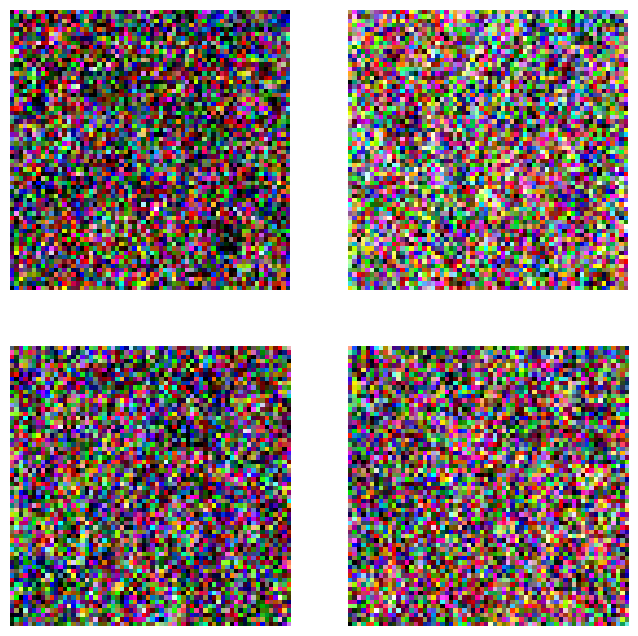

In [3]:
sampled_images = diffusion.sample(batch_size=4)
# show the sampled images
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(sampled_images[i].permute(1, 2, 0).cpu().numpy())
    plt.axis('off')
